## Agenda 
        1 - Pré-processamento de dados 
        2 - Ajustando o modelo de regressão linear ao conjunto de treinamento 
        3 - Prevendo o resultado 
        4 - Visualização

**Olhos nos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('studentscores.csv')

In [2]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# É um conjuto pequeno
dataset.shape

(25, 2)

In [4]:
# Não há valores NaN 
dataset.isna().any()

Hours     False
Scores    False
dtype: bool

## 1 - Pré-processamento de Dados
        Basicamente:
        Feature são os dados que damos ao algoritmo.
        Label é o que queremos prever.
        
        Ex: Ei, Machine, diga-me se este vídeo (feature) pode ser acessado por crianças.
            
            [A máquina usa o que aprendeu analisando outros vídeos e retorna uma previsão / probabilidade]
            
            0 - Sim, pode. (label)
            1 - Não, não pode. (label)
        
            Agora, o sistema pode decidir se o vídeo será disponibilizado para crianças ou não.
            
            
        No nosso caso, temos:
            
            Ei, Machine, qual será minha pontuação (label) se estudar N horas (feature)?
        
        E para fazer o modelo aprender a correlação entre essas duas variáveis (horas estudadas e pontuação no teste),
        primeiro precisamos dar uma amostra, para que ele possa aplicar matemática e descobrir "as regras do jogo", e 
        no final, ele poderá jogar de acordo com tais regras e nos fornecer uma resposta / classificação adequada.

In [5]:
# Por convenção, chamamos as features de 'X' e os labels de 'Y'
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values

In [6]:
''' Dê uma olhada, apenas separamos as colunas '''

print("length of ['Hours']  --", len(dataset.Hours))
print("length of ['Scores'] --", len(dataset.Scores))
print('length of X -', len(X))
print('length of Y -', len(Y))

length of ['Hours']  -- 25
length of ['Scores'] -- 25
length of X - 25
length of Y - 25


In [7]:
stop_point = 0

for hour, x in zip(dataset.Hours, X):
    print('\nhour in dataset: ', hour)
    print('feature X: ', x)
    
    if stop_point == 5: break
    stop_point+=1


hour in dataset:  2.5
feature X:  [2.5]

hour in dataset:  5.1
feature X:  [5.1]

hour in dataset:  3.2
feature X:  [3.2]

hour in dataset:  8.5
feature X:  [8.5]

hour in dataset:  3.5
feature X:  [3.5]

hour in dataset:  1.5
feature X:  [1.5]


In [8]:
stop_point = 0

for score, y in zip(dataset.Scores, Y):
    print('\nhour in dataset: ', score)
    print('label Y: ', y)
    
    if stop_point == 5: break
    stop_point+=1


hour in dataset:  21
label Y:  21

hour in dataset:  47
label Y:  47

hour in dataset:  27
label Y:  27

hour in dataset:  75
label Y:  75

hour in dataset:  30
label Y:  30

hour in dataset:  20
label Y:  20


**Agora, temos nossas features e labels. Então, precisamos dividir nossos dados em subconjuntos de treinamento e teste.**<br>
    
    E como você vê, fazemos isso utilizando o método train_test_split()


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

    test_size ==> proporção do conjunto de dados a ser incluída na divisão de teste 1/4 = 25%
     (a outra parte será tratada como dados de treinamento)

In [10]:
dataset_rows = 25 # Número total de features e labels
7/dataset_rows # Note que o método aproxima essa divisão para cima (sabendo que 6/25 is 24%)

0.28

    random_state ==> defini-lo como um valor fixo garantirá que a mesma sequência de números aleatórios 
    seja gerada toda vez que você executar o código. E, a menos que haja alguma outra aleatoriedade presente
    no processo, os resultados produzidos serão os mesmos de sempre. Em outras palavras, na primeira vez em 
    que rodarmos o código haverá uma seleção aleatória, nas próximas vezes, os números serão os mesmos 
    (para fins de estudos).

In [11]:
print('X_train length:', len(X_train))
print('X_test length: ', len(X_test))
print('Y_train length:',len(Y_train))
print('Y_test length: ', len(Y_test))

print(f'{len(X_train)} + {len(X_test)} =', len(X_train)+len(X_test))

X_train length: 18
X_test length:  7
Y_train length: 18
Y_test length:  7
18 + 7 = 25


In [12]:
''' 25 valores, como nas 25 linhas do nosso dataset '''
dataset.shape

(25, 2)

In [13]:
''' Uma olhada rápida nas features e labels '''
print('X_train (features used in training)\n', X_train)   # hours -  features
print('\nY_train (labels used in training)\n', Y_train)   # scores - labels
print('--'*20)
print('\nX_test (features the model will see after training so we can see how good it went)\n', X_test) 
print('\nY_test (labels/ correct answers/predictions the model should give us when we give X_test to it predict)\n', Y_test)

X_train (features used in training)
 [[7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]

Y_train (labels used in training)
 [86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
----------------------------------------

X_test (features the model will see after training so we can see how good it went)
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]

Y_test (labels/ correct answers/predictions the model should give us when we give X_test to it predict)
 [20 27 69 30 62 35 24]


## 2 - Ajustando o modelo de regressão linear ao conjunto de treinamento 

        Escolhendo a linha/função(y = mx + b) correta para este modelo.
        Fazendo o algoritmo aprender a relação entre os recursos e os rótulos. assim
        ele poderá usar as "regras do jogo" para jogá-lo.   

In [14]:
from sklearn.linear_model import LinearRegression

# Criando um object (regressor) da classe LinearRegression para termos acesso aos seus métodos
regressor = LinearRegression()

Em poucas palavras: **o "fit" é o mesmo que treinar o modelo**. Depois que o modelo for treinado<br> 
**.fit(features, labels_das_features_usados_para_comparar_e_aprender)**, ele poderá ser usado para fazer previsões, geralmente o método .predict()

In [15]:
regressor = regressor.fit(X_train, Y_train)

## 3 - Prevendo o resultado
        Se você prestar atenção, notará que acabamos de passar o X_train e o Y_train para o modelo.
        Agora que ele está treinado, podemos usar o X_test e Y_test para verificar se está funcionando
        como nósqueríamos e prevendo as pontuações para horas de estudo que nunca foram passadas ao modelo.

In [16]:
# Você pode até procurar por esses números no dataset, e Lembre-se:
print('X_test:\n', X_test)   # Feature são os dados que alimentamos o algoritmo com.
print('\nY_test:\n', Y_test) # Label é o que que queremos prever.

X_test:
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]

Y_test:
 [20 27 69 30 62 35 24]


**Agora que sabemos os valores reais da pontuação, podemos compará-los com a previsão que o modelo fará.**

In [17]:
# Predição dos valores do Score
Y_pred = regressor.predict(X_test)

for study_hours, test_value, predicted_value in zip(X_test, Y_test,Y_pred):
    print('\nHours of study -------------------', study_hours)
    print('Real score value -----------------', test_value)
    print('Prediction from Linear Regression ', int(predicted_value))


Hours of study ------------------- [1.5]
Real score value ----------------- 20
Prediction from Linear Regression  16

Hours of study ------------------- [3.2]
Real score value ----------------- 27
Prediction from Linear Regression  33

Hours of study ------------------- [7.4]
Real score value ----------------- 69
Prediction from Linear Regression  75

Hours of study ------------------- [2.5]
Real score value ----------------- 30
Prediction from Linear Regression  26

Hours of study ------------------- [5.9]
Real score value ----------------- 62
Prediction from Linear Regression  60

Hours of study ------------------- [3.8]
Real score value ----------------- 35
Prediction from Linear Regression  39

Hours of study ------------------- [1.9]
Real score value ----------------- 24
Prediction from Linear Regression  20


## 4 - Visualização
        Os pontos vermelhos representam os dados reais (do subconjunto de treinamento):
        
        Y_train
        |
        |
        |
        |
        |
        |
        |_______________X_train   
        
        E a linha azul são os valores de Y que o modelo previu.
        
        Durante o treinamento, o modelo/algoritmo está criando/ajustando a melhor linha/função(y = mx + b)
        que se ajusta aos dados. E dessa forma, ele pode prever outros valores.       

Text(0, 0.5, 'Score')

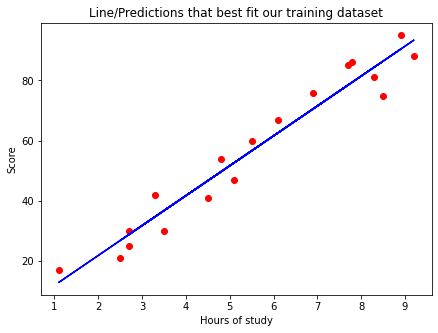

In [18]:
# Visualizando os resultados do treinamento
plt.figure(figsize=(7,5))
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

plt.title('Line/Predictions that best fit our training dataset')
plt.xlabel('Hours of study')
plt.ylabel('Score')

        Aqui, basicamente temos a mesma previsão, mas aplicada
        nos dados que o modelo nunca viu (subconjunto de teste):

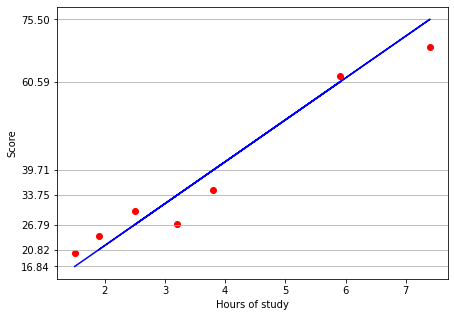

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , regressor.predict(X_test), color ='blue')
plt.xlabel('Hours of study')
plt.ylabel('Score')
plt.yticks(Y_pred)
plt.grid(axis='y')